In [16]:
import os
import sys
import absl
import json
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from time import time
from numba import njit
import h5py
import plotting_figures as myplots

parentDir = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))
sys.path.append(os.path.join(parentDir, "general_utils"))
import file_management
sys.path.append(os.path.join(parentDir, "billeh_model_utils"))
import other_billeh_utils

mpl.style.use('default')
np.random.seed(3000)

In [2]:
orientation = 0
frequency = 2
reverse = False
n_neurons = 51978
neuron_population = 'e23'
simulation_length = 2500
directory = f'orien_{str(orientation)}_freq_{str(frequency)}_reverse_{str(reverse)}_rec{n_neurons}'
full_path = os.path.join('Simulation_results', directory)
full_data_path = os.path.join(full_path, 'Data')
images_path = os.path.join('Images_general', 'Model representation')

In [15]:
# Selection of the candidate neurons
percentage_of_selected_neurons = 0.005
network = file_management.load_lzma(os.path.join(full_data_path, 'network.lzma'))
population_names = other_billeh_utils.pop_names(network)
population_names = np.array([pop_name if pop_name[0]=='i' else pop_name[:2] for pop_name in population_names])

pop_dict = {}
for pop_name in population_names:
    if pop_name[0]=='e':
        pop_color = 'darkred'
        alpha = 0.4
    elif 'Pvalb' in pop_name:
        pop_color = 'darkblue'
        alpha = 1
    elif 'Sst' in pop_name:
        pop_color = 'darkgreen' # lime
        alpha = 1
    elif 'Htr3a' in pop_name:
        pop_color = 'darkviolet'
        alpha = 1
    tf_indices = np.arange(n_neurons)[population_names == pop_name]
    pop_size = len(tf_indices)
    selected_tf_indices = np.random.choice(tf_indices, size=int(pop_size*percentage_of_selected_neurons), replace=False)
    pop_dict[pop_name] = {'indices': selected_tf_indices,
                          'x': network['x'][selected_tf_indices],
                          'y': network['y'][selected_tf_indices],
                          'z': network['z'][selected_tf_indices],
                          'color':pop_color,
                          'alpha':alpha}                      

## Simple network representation (dark background)

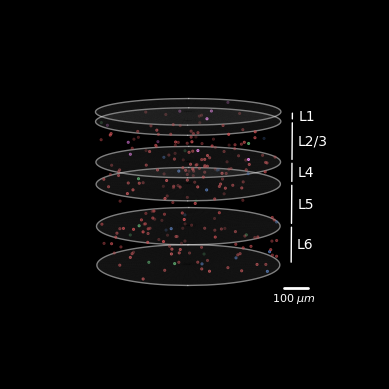

In [4]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for pop_name in pop_dict.keys():
    x = pop_dict[pop_name]['x']
    y = pop_dict[pop_name]['y']
    z = pop_dict[pop_name]['z']
    color = pop_dict[pop_name]['color']
    ax.scatter(x, z, y, 'o', s=0.5, color=color)

x_circ = np.linspace(-400, 400, 100)
z_circ = np.sqrt(400**2 - x_circ**2)
x_vert = np.zeros((100))
z_vert = 450*np.ones((100))
R = np.linspace(0, 400, 100)
u = np.linspace(0,  2*np.pi, 100)
x = np.outer(R, np.cos(u))
z = np.outer(R, np.sin(u))
upper_limit = -50
layer_limits = [-100, -310, -425, -645, -850]
layers = ['L1', 'L2/3', 'L4', 'L5', 'L6']
ax.plot(x_circ, z_circ, -50, color='white', linewidth=1, alpha=0.5)
ax.plot(x_circ, -z_circ, -50, color='white', linewidth=1, alpha=0.5)
ax.plot_surface(x,z,upper_limit*np.ones(x.shape), alpha=0.15, color='white', linewidth=0)    
for layer, lower_limit in zip(layers, layer_limits):
    ax.plot(x_circ, z_circ, lower_limit, color='white', linewidth=1, alpha=0.5)
    ax.plot(x_circ, -z_circ, lower_limit, color='white', linewidth=1, alpha=0.5)
    ax.plot_surface(x,z,lower_limit*np.ones(x.shape), alpha=0.15, color='white', linewidth=0)
    # Lateral layers legend
    ax.plot(np.zeros((100)), 450*np.ones((100)), np.linspace(lower_limit+10, upper_limit-10, 100), color='white', linewidth=1, alpha=1)
    ax.text(0, 475, np.mean([lower_limit, upper_limit]), layer, color='white', fontsize=10, verticalalignment='center')
    upper_limit = lower_limit
    
z_scale = np.linspace(400, 500, 100)
x_scale = 450*np.ones(100)
y_scale = -850*np.ones(100)
ax.plot(x_scale, z_scale, y_scale, color='white', linewidth=2, alpha=1)    
ax.text(670, 430, -850, r'100 $\mu m$', color='white', fontsize=8, horizontalalignment='center')

# Vertical bars from the cylinder
# y = np.linspace(-50, -850, 100)
# x = np.zeros(100)
# z = 400*np.ones(100)
# ax.plot(x, z, y, color='white', linewidth=1, alpha=0.7)    
# ax.plot(x, -z, y, color='white', linewidth=1, alpha=0.7)    

plt.axis('off')
ax.view_init(elev=10, azim=0)
plt.savefig(os.path.join(images_path, "model_representation.png"), dpi=300, transparent=True)

## Simple network representation (white background)

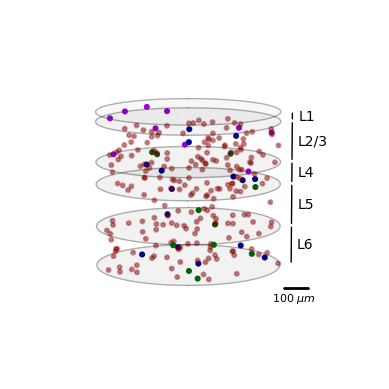

In [16]:
sns.set(style="ticks", context="talk")
# plt.style.use('classic')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for pop_name in pop_dict.keys():
    x = pop_dict[pop_name]['x']
    y = pop_dict[pop_name]['y']
    z = pop_dict[pop_name]['z']
    color = pop_dict[pop_name]['color']
    alpha = pop_dict[pop_name]['alpha']
    ax.scatter(x, z, y, 'o', alpha=alpha, s=8, color=color)

x_circ = np.linspace(-400, 400, 100)
z_circ = np.sqrt(400**2 - x_circ**2)
x_vert = np.zeros((100))
z_vert = 450*np.ones((100))
R = np.linspace(0, 400, 100)
u = np.linspace(0,  2*np.pi, 100)
x = np.outer(R, np.cos(u))
z = np.outer(R, np.sin(u))
upper_limit = -50
layer_limits = [-100, -310, -425, -645, -850]
layers = ['L1', 'L2/3', 'L4', 'L5', 'L6']
ax.plot(x_circ, z_circ, -50, color='black', linewidth=1, alpha=0.3)
ax.plot(x_circ, -z_circ, -50, color='black', linewidth=1, alpha=0.3)
ax.plot_surface(x,z,upper_limit*np.ones(x.shape), alpha=0.05, color='white', linewidth=0)    
for layer, lower_limit in zip(layers, layer_limits):
    ax.plot(x_circ, z_circ, lower_limit, color='black', linewidth=1, alpha=0.3)
    ax.plot(x_circ, -z_circ, lower_limit, color='black', linewidth=1, alpha=0.3)
    ax.plot_surface(x,z,lower_limit*np.ones(x.shape), alpha=0.05, color='black', linewidth=0)
    # Lateral layers legend
    ax.plot(np.zeros((100)), 450*np.ones((100)), np.linspace(lower_limit+10, upper_limit-10, 100), color='black', linewidth=1, alpha=1)
    ax.text(0, 475, np.mean([lower_limit, upper_limit]), layer, color='black', fontsize=10, verticalalignment='center')
    upper_limit = lower_limit
    
z_scale = np.linspace(400, 500, 100)
x_scale = 450*np.ones(100)
y_scale = -850*np.ones(100)
ax.plot(x_scale, z_scale, y_scale, color='black', linewidth=2, alpha=1)    
ax.text(670, 430, -850, r'100 $\mu m$', color='black', fontsize=8, horizontalalignment='center')

# Vertical bars from the cylinder
# y = np.linspace(-50, -850, 100)
# x = np.zeros(100)
# z = 400*np.ones(100)
# ax.plot(x, z, y, color='white', linewidth=1, alpha=0.7)    
# ax.plot(x, -z, y, color='white', linewidth=1, alpha=0.7)    

plt.axis('off')
ax.view_init(elev=10, azim=0)
plt.savefig(os.path.join(images_path, "model_representation_white.png"), dpi=300, transparent=True)

## GIF from the network representation

In [6]:
import imageio
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
    
filenames = []
for azimuth in np.linspace(0, 2*np.pi, 100):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for pop_name in pop_dict.keys():
        x = pop_dict[pop_name]['x']
        y = pop_dict[pop_name]['y']
        z = pop_dict[pop_name]['z']
        color = pop_dict[pop_name]['color']
        radius = np.sqrt(x**2 + z**2)
        angle = np.arctan2(z, x)
        ax.scatter(radius*np.cos(angle+azimuth), radius*np.sin(angle+azimuth), y, 'o', s=0.5, color=color)

    x_circ = np.linspace(-400, 400, 100)
    z_circ = np.sqrt(400**2 - x_circ**2)
    x_vert = np.zeros((100))
    z_vert = 450*np.ones((100))
    R = np.linspace(0, 400, 100)
    u = np.linspace(0,  2*np.pi, 100)
    x = np.outer(R, np.cos(u))
    z = np.outer(R, np.sin(u))
    upper_limit = -50
    layer_limits = [-100, -310, -425, -645, -850]
    layers = ['L1', 'L2/3', 'L4', 'L5', 'L6']
    ax.plot(x_circ, z_circ, -50, color='white', linewidth=1, alpha=0.5)
    ax.plot(x_circ, -z_circ, -50, color='white', linewidth=1, alpha=0.5)
    ax.plot_surface(x,z,upper_limit*np.ones(x.shape), alpha=0.15, color='white', linewidth=0)    
    for layer, lower_limit in zip(layers, layer_limits):
        ax.plot(x_circ, z_circ, lower_limit, color='white', linewidth=1, alpha=0.5)
        ax.plot(x_circ, -z_circ, lower_limit, color='white', linewidth=1, alpha=0.5)
        ax.plot_surface(x,z,lower_limit*np.ones(x.shape), alpha=0.15, color='white', linewidth=0)
        # Lateral layers legend
        ax.plot(np.zeros((100)), 450*np.ones((100)), np.linspace(lower_limit+10, upper_limit-10, 100), color='white', linewidth=1, alpha=1)
        ax.text(0, 475, np.mean([lower_limit, upper_limit]), layer, color='white', fontsize=10, verticalalignment='center')
        upper_limit = lower_limit

    z_scale = np.linspace(400, 500, 100)
    x_scale = 450*np.ones(100)
    y_scale = -850*np.ones(100)
    ax.plot(x_scale, z_scale, y_scale, color='white', linewidth=2, alpha=1)    
    ax.text(670, 430, -850, r'100 $\mu m$', color='white', fontsize=8, horizontalalignment='center')

    # create file name and append it to a list
    filename = f'{azimuth}.png'
    filenames.append(filename)
    
    # save frame
    plt.axis('off')
    ax.view_init(elev=10, azim=0)
    plt.savefig(filename, dpi=300, transparent=True)
    plt.close()

# build gif
with imageio.get_writer(os.path.join(images_path, "model_representation.gif"), mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)